In [2]:
import numpy as np
import cv2
from PIL import Image

Для 1 лаб работы по CV необходимо реализовать базовый минимум операций над изображениями
Входное изображение в формате (RGB, не чёрно-белое)
1. Фильтры

1.1 Медианный фильтр

1.2 Фильтр гаусса
2. Морфологические операции

2.1 Эрозия

2.2 Дилатация

3. Прочие операции

3.1 пороговая бинаризация (для rgb и grayscale изображения)

3.2 выравнивание гистограммы

3.3 поворот изображений на угол кратный 90 градусов


In [ ]:
image = cv2.imread('../Sourse_Images/butterfly_on_a_flower.jpg')
print(f"Размер: {image.shape}")  # (высота, ширина, каналы)
print(f"Тип данных: {image.dtype}")  # uint8
# Конвертация в RGB
#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Размер: (1836, 3264, 3)
Тип данных: uint8


In [ ]:
'''
cv2.imshow('Image', image)
cv2.waitKey(0)  # ждёт нажатия любой клавиши
cv2.destroyAllWindows()
'''

In [ ]:
##PIL

img = Image.open('../Sourse_Images/butterfly_on_a_flower.jpg')
# Конвертация в массив NumPy
image_array = np.array(img)
print(f"Размер: {image_array.shape}")
print(f"Тип данных: {image_array.dtype}")
#img.show()  # откроет в стандартном просмотрщике ОС

Размер: (1836, 3264, 3)
Тип данных: uint8


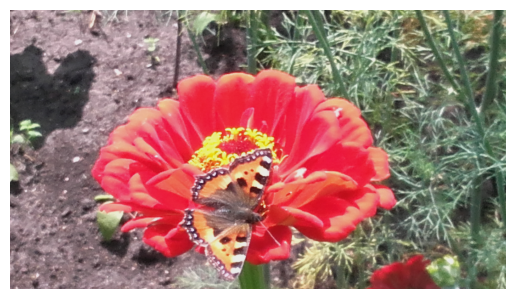

In [19]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Загрузка изображения
image = mpimg.imread('../Sourse_Images/butterfly_on_a_flower.jpg')

# Если нужно преобразовать в оттенки серого
gray_image = np.mean(image, axis=2)  # для RGB изображений
# или
from skimage.color import rgb2gray
gray_image = rgb2gray(image)


plt.imshow(img)
plt.axis('off')  # скрыть оси
plt.show()

In [ ]:
#%matplotlib inline

3.3 Поворот изображения на угол кратный 90&deg;

In [ ]:
#cv2.imwrite('output.jpg', image)

# Numpy

## Массивы

In [ ]:
import numpy as np

# Заполненный нулями
zeros_3d = np.zeros((2, 3, 4))  # 2x3x4

# Заполненный единицами
ones_3d = np.ones((2, 3, 4))

# Единичная матрица (только для 2D, нужно расширять)
identity = np.eye(3)[np.newaxis, :, :]  # (1, 3, 3)

# Случайные числа
random_3d = np.random.rand(2, 3, 4)

# Заполненный определенным значением
full_3d = np.full((2, 3, 4), 255)

# Пустой массив (без инициализации)
empty_3d = np.empty((2, 3, 4))

In [ ]:
import numpy as np

# Самые часто используемые методы:
arr1 = np.random.rand(3, 4)        # [0, 1) равномерное
arr2 = np.random.randint(0, 10, (3, 4))  # целые числа
arr3 = np.random.randn(3, 4)       # нормальное распределение
arr4 = np.random.random((3, 4))    # [0, 1) равномерное (альтернатива)
arr5 = np.random.uniform(0, 1, (3, 4))  # равномерное с параметрами
arr6 = np.random.normal(0, 1, (3, 4))   # нормальное с параметрами

# Новый стиль (рекомендуемый):
rng = np.random.default_rng(42)    # генератор с seed
arr7 = rng.random((3, 4))          # [0, 1)
arr8 = rng.integers(0, 10, (3, 4)) # целые
arr9 = rng.normal(0, 1, (3, 4))    # нормальное

In [ ]:
gaussian = cv2.GaussianBlur(img, (5, 5), 1.5)

In [ ]:
#Медианный фильтр старая реализация
def Median_filter(image: np.ndarray, filtersize: int = 3) -> np.ndarray:
    H = image.shape[0]
    W = image.shape[1]
    C = image.shape[2]
    edge = 1
    if (filtersize % 2 and filtersize > 0):
        edge = (filtersize - 1) // 2
    else:
        ####Error
        raise ValueError("Размер ядра должен быть нечетным числом")
        # res_image = np.zeros((H, W, C))

    # kernel = np.zeros((filtersize, filtersize))
    buf_image = np.zeros((H + 2 * edge, W + 2 * edge, C), dtype=image.dtype)  # np.uint8

    buf_image[edge: H + edge, edge: W + edge, :] = image #image.copy()

    res_image = np.zeros((H, W, C))  # dtype=image.dtype)
    for k in range(C):
        for i in range(edge, H-edge):
            for j in range(edge, W-edge):
                value_array = np.zeros(1, dtype=np.uint8)
                for jl in range(2 * edge + 1):
                    for il in range(2 * edge + 1):
                        if (il + jl == 0):
                            value_array[0] = buf_image[i + il][j + jl][k]
                        else:
                            arr_len = len(value_array)
                            for pos in range(arr_len):
                                pos_val = buf_image[i + il][j + jl][k]
                                if (value_array[pos] >= pos_val):
                                    value_array1 = np.insert(value_array, pos, pos_val)
                                    value_array = value_array1
                                    break
                                elif (pos == arr_len - 1):
                                    value_array1 = np.append(value_array, pos_val)
                                    value_array = value_array1
                            
                for q in range(len(value_array)):
                    print(f"{value_array[q]} ", end='')
                print()
                center = len(value_array) // 2
                value = value_array[center]
                res_image[i][j][k] = value
    for k in range(C):
        for i in range(edge):
            for j in range(edge):
                pass
    for k in range(C):
        for i in range(H-edge, H):
            for j in range(W-edge, W):
                pass
    result[:pad, :] = image[:pad, :]
    result[-pad:, :] = image[-pad:, :]
    result[:, :pad] = image[:, :pad]
    result[:, -pad:] = image[:, -pad:]
    return res_image.astype(np.uint8)


Версия 2 

In [ ]:
def Median_filter(image: np.ndarray, filtersize: int = 3) -> np.ndarray:
    H = image.shape[0]
    W = image.shape[1]
    C = image.shape[2]
    edge = 1
    if (filtersize % 2 and filtersize > 0):
        edge = (filtersize - 1) // 2
    else:
        ####Error
        raise ValueError("Размер ядра должен быть нечетным числом")

    res_image = np.zeros((H, W, C), dtype=image.dtype)  # dtype=image.dtype)
    for k in range(C):
        for i in range(edge,H-edge):
            for j in range(edge,W-edge):
                value_array = np.zeros(1, dtype=image.dtype)#dtype=np.uint8
                for jl in range(2 * edge + 1):
                    for il in range(2 * edge + 1):
                        if (il + jl == 0):
                            value_array[0] = image[i - edge + il][j - edge + jl][k]
                        else:
                            arr_len = len(value_array)
                            for pos in range(arr_len):
                                pos_val = image[i - edge + il][j - edge + jl][k]
                                if (value_array[pos] >= pos_val):
                                    value_array1 = np.insert(value_array, pos, pos_val)
                                    value_array = value_array1
                                    break
                                elif (pos == arr_len - 1):
                                    value_array1 = np.append(value_array, pos_val)
                                    value_array = value_array1
                            
                for q in range(len(value_array)):
                    print(f"{value_array[q]} ", end='')
                print()
                arr_len = len(value_array)
                center =arr_len // 2
                if (center > 1 and arr_len % 2 == 0):
                    center = center - 1
                value = value_array[center]
                res_image[i][j][k] = value

    for ed in range(1, edge+1):  
        for k in range(C):
            for i in range(edge-ed,-1, -1):
                for j in range(ed,W-ed):
                    value_array = np.zeros(1, dtype=image.dtype)
                    for jl in range(2 * edge + 1):
                        for il in range(ed,2 * edge + 1):
                            if (il + jl == ed):
                                value_array[0] = image[i - edge + il][j - edge + jl][k]
                            else:
                                arr_len = len(value_array)
                                for pos in range(arr_len):
                                    pos_val = image[i - edge + il][j - edge + jl][k]
                                    if (value_array[pos] >= pos_val):
                                        value_array1 = np.insert(value_array, pos, pos_val)
                                        value_array = value_array1
                                        break
                                    elif (pos == arr_len - 1):
                                        value_array1 = np.append(value_array, pos_val)
                                        value_array = value_array1
                                
                    for q in range(len(value_array)):
                        print(f"{value_array[q]} ", end='')
                    print()
                    arr_len = len(value_array)
                    center =arr_len // 2
                    if (center > 1 and arr_len % 2 == 0):
                        center = center - 1
                    value = value_array[center]
                    res_image[i][j][k] = value
    """
    for ed in range(1, edge+1):  
        for k in range(C):
            for i in range(H-(edge-ed),H-edge-1, -1):
                for j in range(ed,W-ed):
                    value_array = np.zeros(1, dtype=image.dtype)
                    for jl in range(2 * edge + 1-ed):
                        for il in range(2 * edge + 1):
                            if (il + jl == ed):
                                value_array[0] = image[i - edge + il][j - edge + jl][k]
                            else:
                                arr_len = len(value_array)
                                for pos in range(arr_len):
                                    pos_val = image[i - edge + il][j - edge + jl][k]
                                    if (value_array[pos] >= pos_val):
                                        value_array1 = np.insert(value_array, pos, pos_val)
                                        value_array = value_array1
                                        break
                                    elif (pos == arr_len - 1):
                                        value_array1 = np.append(value_array, pos_val)
                                        value_array = value_array1
                                
                    for q in range(len(value_array)):
                        print(f"{value_array[q]} ", end='')
                    print()
                    arr_len = len(value_array)
                    center =arr_len // 2
                    if (center > 1 and arr_len % 2 == 0):
                        center = center - 1
                    value = value_array[center]
                    res_image[i][j][k] = value
        #horizontal
        for k in range(C):
            for i in range(edge):
                for j in range(edge):
                    pass
        #vertical
        for k in range(C):
            for i in range(H-edge, H):
                for j in range(W-edge, W):
                    pass
        #corners
        """


    return res_image.astype(np.uint8)


In [ ]:
    result[:pad, :] = image[:pad, :]
    result[-pad:, :] = image[-pad:, :]
    result[:, :pad] = image[:, :pad]
    result[:, -pad:] = image[:, -pad:]

Разные варианты расширения зеркалом

In [ ]:
rng = np.random.default_rng(seed=42)# Создаем генератор случайных чисел
test_arr = rng.integers(0, 255, size=(5, 7, 1), dtype=np.uint8)
print(test_arr.squeeze())
print()
image = test_arr
filtersize = 5
H = image.shape[0]
W = image.shape[1]
C = image.shape[2]
edge = 1
if (filtersize % 2 and filtersize > 0):
    edge = (filtersize - 1) // 2
else:
    ####Error
    raise ValueError("Размер ядра должен быть нечетным числом")
    # res_image = np.zeros((H, W, C))

# kernel = np.zeros((filtersize, filtersize))
buf_image = np.zeros((H + 2 * edge, W + 2 * edge, C), dtype=image.dtype)  # np.uint8

buf_image[edge: H + edge, edge: W + edge, :] = image #image.copy()
for ed in range(1, edge+1):  
    for k in range(C):
        buf_image[edge-ed:edge-ed+1,edge:W+edge] = image[ed:ed+1, :]
        buf_image[edge+H+ed-1:edge+H+ed,edge:W+edge] = image[H-ed:H-ed+1, :]
print(buf_image.squeeze())

In [ ]:
rng = np.random.default_rng(seed=42)# Создаем генератор случайных чисел
test_arr = rng.integers(0, 255, size=(7, 8, 1), dtype=np.uint8)
print(test_arr.squeeze())
print()
image = test_arr
filtersize = 5
H = image.shape[0]
W = image.shape[1]
C = image.shape[2]
edge = 1
if (filtersize % 2 and filtersize > 0):
    edge = (filtersize - 1) // 2
else:
    ####Error
    raise ValueError("Размер ядра должен быть нечетным числом")
    # res_image = np.zeros((H, W, C))

# kernel = np.zeros((filtersize, filtersize))
buf_image = np.zeros((H + 2 * edge, W + 2 * edge, C), dtype=image.dtype)  # np.uint8

buf_image[edge: H + edge, edge: W + edge, :] = image #image.copy()
for ed in range(1, edge+1):  
    for k in range(C):
        buf_image[edge-ed:edge-ed+1,edge:W+edge] = image[ed:ed+1, :]
        buf_image[edge+H+ed-1:edge+H+ed,edge:W+edge] = image[H-ed-1:H-ed, :]
for ed in range(1, edge+1):  
    for k in range(C):
        buf_image[:,edge-ed:edge-ed+1] = buf_image[:, edge+ed:edge+ed+1]
        buf_image[:,W+edge+ed-1:W+edge+ed] = buf_image[:, W+edge-ed:W+edge-ed+1]
        #buf_image[edge+H+ed-1:edge+H+ed,edge:W+edge] = image[H-ed-1:H-ed, :]
print(buf_image.squeeze())

Финальный вариант отномительно края, край не дублируется, для дублирования края нужно на 1 изменить индексы с коротых копируются значения

In [ ]:
rng = np.random.default_rng(seed=42)# Создаем генератор случайных чисел
test_arr = rng.integers(0, 255, size=(7, 8, 1), dtype=np.uint8)
print(test_arr.squeeze())
print()
image = test_arr
filtersize = 5
H = image.shape[0]
W = image.shape[1]
C = image.shape[2]
edge = 1
if (filtersize % 2 and filtersize > 0):
    edge = (filtersize - 1) // 2
else:
    ####Error
    raise ValueError("Размер ядра должен быть нечетным числом")
    # res_image = np.zeros((H, W, C))

# kernel = np.zeros((filtersize, filtersize))
buf_image = np.zeros((H + 2 * edge, W + 2 * edge, C), dtype=image.dtype)  # np.uint8

buf_image[edge: H + edge, edge: W + edge, :] = image #image.copy()
for ed in range(1, edge+1):  
    for k in range(C):
        buf_image[edge-ed:edge-ed+1,edge:W+edge] = image[ed:ed+1, :]
        buf_image[edge+H+ed-1:edge+H+ed,edge:W+edge] = image[H-ed-1:H-ed, :]
for ed in range(1, edge+1):  
    for k in range(C):
        buf_image[:,edge-ed:edge-ed+1] = buf_image[:, edge+ed:edge+ed+1]
        buf_image[:,W+edge+ed-1:W+edge+ed] = buf_image[:, W+edge-ed-1:W+edge-ed]
print(buf_image.squeeze())

[[135  37 216  21 204 250  32 197]
 [192 254 144 166  96  85  89 111]
 [ 35  21 217 109 193  17 204 218]
 [140 135  21  13 181 133 177 234]
 [128 146  50 180   0  27  23 139]
 [ 82 198 133 236  97 193 248 112]
 [ 67  89 187  46  12 217 193  63]]

[[217  21  35  21 217 109 193  17 204 218 204  17]
 [144 254 192 254 144 166  96  85  89 111  89  85]
 [216  37 135  37 216  21 204 250  32 197  32 250]
 [144 254 192 254 144 166  96  85  89 111  89  85]
 [217  21  35  21 217 109 193  17 204 218 204  17]
 [ 21 135 140 135  21  13 181 133 177 234 177 133]
 [ 50 146 128 146  50 180   0  27  23 139  23  27]
 [133 198  82 198 133 236  97 193 248 112 248 193]
 [187  89  67  89 187  46  12 217 193  63 193 217]
 [133 198  82 198 133 236  97 193 248 112 248 193]
 [ 50 146 128 146  50 180   0  27  23 139  23  27]]


In [11]:
expand = 2
rng = np.random.default_rng(seed=42)# Создаем генератор случайных чисел
test_arr = rng.integers(0, 255, size=(7, 8, 1), dtype=np.uint8)
print(test_arr.squeeze())
print()
image = test_arr
filtersize = 5
H = image.shape[0]
W = image.shape[1]
C = image.shape[2]
edge = 1
if (filtersize % 2 and filtersize > 0):
    edge = (filtersize - 1) // 2
else:
    ####Error
    raise ValueError("Размер ядра должен быть нечетным числом")
    # res_image = np.zeros((H, W, C))

# kernel = np.zeros((filtersize, filtersize))
buf_image = np.zeros((H + 2 * edge, W + 2 * edge, C), dtype=image.dtype)  # np.uint8

buf_image[edge: H + edge, edge: W + edge, :] = image #image.copy()        
if expand == 1:
    bias = 0
elif expand == 2:
    bias = 1      
else:
    raise ValueError("Некорректное значения для расширения изображения")
for ed in range(1, edge+1):  
    for k in range(C):
        buf_image[edge-ed:edge-ed+1,edge:W+edge] = image[ed-1+bias:ed+bias, :]
        buf_image[edge+H+ed-1:edge+H+ed,edge:W+edge] = image[H-ed-bias:H-ed+1-bias, :]
for ed in range(1, edge+1):  
    for k in range(C):
        buf_image[:,edge-ed:edge-ed+1] = buf_image[:, edge+ed-1+bias:edge+ed+bias]
        buf_image[:,W+edge+ed-1:W+edge+ed] = buf_image[:, W+edge-ed-bias:W+edge-ed+1-bias]
print(buf_image.squeeze())

[[135  37 216  21 204 250  32 197]
 [192 254 144 166  96  85  89 111]
 [ 35  21 217 109 193  17 204 218]
 [140 135  21  13 181 133 177 234]
 [128 146  50 180   0  27  23 139]
 [ 82 198 133 236  97 193 248 112]
 [ 67  89 187  46  12 217 193  63]]

[[217  21  35  21 217 109 193  17 204 218 204  17]
 [144 254 192 254 144 166  96  85  89 111  89  85]
 [216  37 135  37 216  21 204 250  32 197  32 250]
 [144 254 192 254 144 166  96  85  89 111  89  85]
 [217  21  35  21 217 109 193  17 204 218 204  17]
 [ 21 135 140 135  21  13 181 133 177 234 177 133]
 [ 50 146 128 146  50 180   0  27  23 139  23  27]
 [133 198  82 198 133 236  97 193 248 112 248 193]
 [187  89  67  89 187  46  12 217 193  63 193 217]
 [133 198  82 198 133 236  97 193 248 112 248 193]
 [ 50 146 128 146  50 180   0  27  23 139  23  27]]


In [8]:
rng = np.random.default_rng(seed=42)# Создаем генератор случайных чисел
test_arr = rng.integers(0, 255, size=(7, 8, 1), dtype=np.uint8)
print(test_arr.squeeze())
print()
image = test_arr
filtersize = 5
H = image.shape[0]
W = image.shape[1]
C = image.shape[2]
edge = 1
if (filtersize % 2 and filtersize > 0):
    edge = (filtersize - 1) // 2
else:
    ####Error
    raise ValueError("Размер ядра должен быть нечетным числом")
    # res_image = np.zeros((H, W, C))

# kernel = np.zeros((filtersize, filtersize))
buf_image = np.zeros((H + 2 * edge, W + 2 * edge, C), dtype=image.dtype)  # np.uint8

buf_image[edge: H + edge, edge: W + edge, :] = image #image.copy()
for ed in range(1, edge+1):  
    for k in range(C):
        buf_image[edge-ed:edge-ed+1,edge:W+edge] = image[ed-1:ed, :]
        buf_image[edge+H+ed-1:edge+H+ed,edge:W+edge] = image[H-ed:H-ed+1, :]
for ed in range(1, edge+1):  
    for k in range(C):
        buf_image[:,edge-ed:edge-ed+1] = buf_image[:, edge+ed-1:edge+ed]
        buf_image[:,W+edge+ed-1:W+edge+ed] = buf_image[:, W+edge-ed:W+edge-ed+1]
print(buf_image.squeeze())

[[135  37 216  21 204 250  32 197]
 [192 254 144 166  96  85  89 111]
 [ 35  21 217 109 193  17 204 218]
 [140 135  21  13 181 133 177 234]
 [128 146  50 180   0  27  23 139]
 [ 82 198 133 236  97 193 248 112]
 [ 67  89 187  46  12 217 193  63]]

[[254 192 192 254 144 166  96  85  89 111 111  89]
 [ 37 135 135  37 216  21 204 250  32 197 197  32]
 [ 37 135 135  37 216  21 204 250  32 197 197  32]
 [254 192 192 254 144 166  96  85  89 111 111  89]
 [ 21  35  35  21 217 109 193  17 204 218 218 204]
 [135 140 140 135  21  13 181 133 177 234 234 177]
 [146 128 128 146  50 180   0  27  23 139 139  23]
 [198  82  82 198 133 236  97 193 248 112 112 248]
 [ 89  67  67  89 187  46  12 217 193  63  63 193]
 [ 89  67  67  89 187  46  12 217 193  63  63 193]
 [198  82  82 198 133 236  97 193 248 112 112 248]]


In [9]:
##Изначальная рабочая кофигурация
def Median_filter(image: np.ndarray, filtersize: int = 3) -> np.ndarray:
    H = image.shape[0]
    W = image.shape[1]
    C = image.shape[2]
    edge = 1
    if (filtersize % 2 and filtersize > 0):
        edge = (filtersize - 1) // 2
    else:
        ####Error
        raise ValueError("Размер ядра должен быть нечетным числом")

    res_image = np.zeros((H, W, C), dtype=image.dtype)  # dtype=image.dtype)
    for k in range(C):
        for i in range(H):
            for j in range(W):
                value_array = np.zeros(1, dtype=image.dtype)#dtype=np.uint8
                flag_first = True
                for jl in range(2 * edge + 1):
                    for il in range(2 * edge + 1):
                        H_i = i - edge + il
                        W_j = j - edge + jl

                        if(H_i >=0 and W_j >=0 and H_i < H and W_j < W):
                            element = image[H_i, W_j, k]
                            if (flag_first == True):
                                value_array[0] = element
                                flag_first = False
                            else:
                                arr_len = len(value_array)
                                for pos in range(arr_len):
                                    if (value_array[pos] >= element):
                                        value_array1 = np.insert(value_array, pos, element)
                                        value_array = value_array1
                                        break
                                    elif (pos == arr_len - 1):
                                        value_array1 = np.append(value_array, element)
                                        value_array = value_array1
                        else:
                            continue
                        
                for q in range(len(value_array)):
                    print(f"{value_array[q]} ", end='')
                print()
                arr_len = len(value_array)
                center =arr_len // 2
                #if (center > 1 and arr_len % 2 == 0):
                #    center = center - 1
                value = value_array[center]
                res_image[i][j][k] = value
    return res_image.astype(np.uint8)